In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Z:\MIT FutureMakers\Week 3/housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
# convert the data into an array 

dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
# Now, we are going to split our dataset
# Input features(X) = columns 0-9
# Label of we wish to predict(Y) = column 10
# Everything before the comme represent rows, everything after the comma represent columns

X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
# Now we need to make sure the scale of our input features are similar
# ie. normalization
# we will use the function "MinMaxScaler" from the preprocessing library
# it will scale our dataset so that all the input features lie between 0-1

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
# Notice how all the input values are now between 0-1

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
# Now we need to split our data into a training set, a validation set, and a test set
# We will use "train_test_split" from scikit-learn to do that
# "val_and_test" will be 30% of the overall daataset

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [10]:
# This function only splits our dataset into 2, but we want 3 sets. 
# We can use the same function to do the split again on "val_and_test"

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
# Verifying the shapes of the split datasets

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [12]:
# Building the model

from keras.models import Sequential
from keras.layers import Dense

In [13]:
# This code defines our architecture
# 1st layer = dense layer with 32 neurons, ReLU activation, and input shape = 10
# 2nd layer = dense layer with 32 neurons, ReLU activation. (size inferred from layer 1)
# 3rd layer = dense layer with 1 neuron, sigmoid activation

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [14]:
# Before training, we need to configure our model
# 1) Telling it which algorithm you want to use to do the optimization
# 2) Telling it what loss function to use
# 3) Telling it what other metrics you want to track apart from the loss function

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Let's begin training our model!
# We need to speficy what data we are training on (X_train and Y_train)
# Then, we need to specify the size of our mini-batch and how long we want to train it (ie. no. of epochs)
# Then, we specify what our validation data is so the model can tell us how we are doing 

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 9s 13ms/step - loss: 0.6970 - accuracy: 0.5166 - val_loss: 0.7003 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.4912 - val_loss: 0.6966 - val_accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5300 - val_loss: 0.6897 - val_accuracy: 0.5251
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5142 - val_loss: 0.6865 - val_accuracy: 0.5342
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5491 - val_loss: 0.6833 - val_accuracy: 0.5708
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5651 - val_loss: 0.6801 - val_accuracy: 0.5982
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8528 - val_loss: 0.3656 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8598 - val_loss: 0.3614 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8862 - val_loss: 0.3561 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8684 - val_loss: 0.3504 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8764 - val_loss: 0.3459 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8796 - val_loss: 0.3413 - val_accuracy: 0.8904
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8860 - val_loss: 0.3377 - val_accuracy: 0.8950
Epoch 

In [17]:
# Now, let's evaluate our model on the test set
# model.evaluate returns the loss as the 1st element and the accuracy as the 2nd element
# We only want to output the accuracy, so we just need index 1 

model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 831us/step - loss: 0.2702 - accuracy: 0.8995


0.8995434045791626

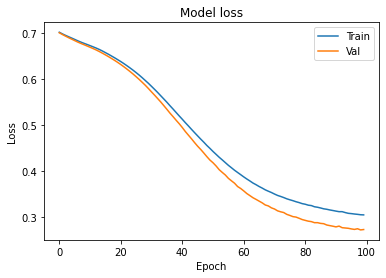

In [18]:
# Now, we are going to try and visualize the training loss and the validation loss

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

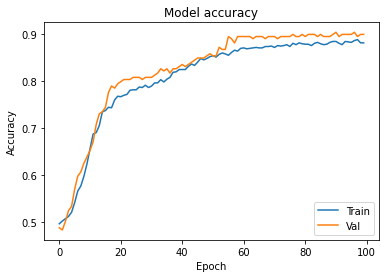

In [20]:
# Plotting the training accuracy and validation accuracy
# Notice that the improvements in the training set looks somewhat matched up with improvements to the validation set
# Overfitting doesn't seem to be a huge problem here

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
# Let's take a look at a neural network that will badly overfit our training set (Model 2)

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 24ms/step - loss: 0.5956 - accuracy: 0.6511 - val_loss: 0.4108 - val_accuracy: 0.7945
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.3472 - accuracy: 0.8592 - val_loss: 0.3299 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2922 - accuracy: 0.8715 - val_loss: 0.3153 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 0s 14ms/step - loss: 0.3120 - accuracy: 0.8784 - val_loss: 0.2949 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2830 - accuracy: 0.8714 - val_loss: 0.2895 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2911 - accuracy: 0.8642 - val_loss: 0.2433 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2653 - accuracy: 0.8918 - val_loss: 0.2514 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 0s 14ms/step - loss: 0.1462 - accuracy: 0.9374 - val_loss: 0.2319 - val_accuracy: 0.9178
Epoch 59/100
32/32 [==============================] - 0s 14ms/step - loss: 0.1435 - accuracy: 0.9386 - val_loss: 0.2818 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 0s 14ms/step - loss: 0.1461 - accuracy: 0.9227 - val_loss: 0.3134 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 0s 14ms/step - loss: 0.1653 - accuracy: 0.9268 - val_loss: 0.3272 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1738 - accuracy: 0.9257 - val_loss: 0.2380 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 0s 14ms/step - loss: 0.1300 - accuracy: 0.9402 - val_loss: 0.2676 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 0s 14ms/step - loss: 0.1368 - accuracy: 0.9452 - val_loss: 0.2950 - val_accuracy: 0.8904
Epoch 65/100

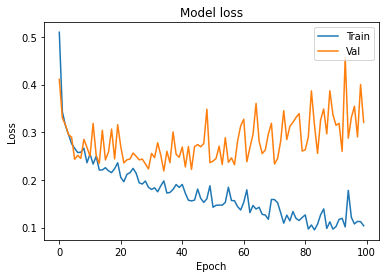

In [24]:
# Let's see what happen when we plot the loss graphs
# Notice how the training loss is decreasing
# But the validation loss is way above the training loss and increasing
# This is a clear sign of overfitting

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

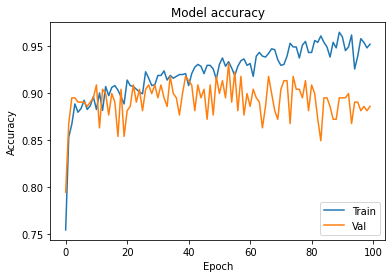

In [26]:
# Let's try plotting the accuracy graphs
# Again, notice the divergence between the training and validation accuracy
# Another clear sign of overfitting

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
# We are going to incorporate L2 regularization and dropout to reduce overfitting
# We are also going to specify a third model with kernel_regularizer and an extra Dropout layer
# Dropout(0.3) means that the neurons in the previous layer has a 0.3 probability of dropping out during training

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [29]:
# Let's train the modle using the same parameters as Model 2

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 34ms/step - loss: 21.1309 - accuracy: 0.5341 - val_loss: 3.9044 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 2.4908 - accuracy: 0.8094 - val_loss: 0.6251 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.6204 - accuracy: 0.8555 - val_loss: 0.5018 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5110 - accuracy: 0.8819 - val_loss: 0.4683 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4913 - accuracy: 0.8694 - val_loss: 0.4737 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5241 - accuracy: 0.8693 - val_loss: 0.4357 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4932 - accuracy: 0.8536 - val_loss: 0.4495 - val_accuracy: 0.9041
Epoch

32/32 [==============================] - 1s 23ms/step - loss: 0.4369 - accuracy: 0.8803 - val_loss: 0.4036 - val_accuracy: 0.8995
Epoch 59/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4419 - accuracy: 0.8776 - val_loss: 0.4043 - val_accuracy: 0.9041
Epoch 60/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4535 - accuracy: 0.8613 - val_loss: 0.4587 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4432 - accuracy: 0.8736 - val_loss: 0.4006 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4565 - accuracy: 0.8742 - val_loss: 0.3988 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4456 - accuracy: 0.8759 - val_loss: 0.3999 - val_accuracy: 0.9041
Epoch 64/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4615 - accuracy: 0.8681 - val_loss: 0.4284 - val_accuracy: 0.8858
Epoch 65/100

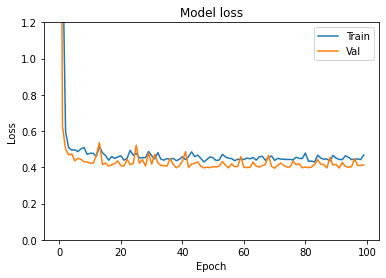

In [31]:
# loss graph for Model 3
# Notice now that the validation loss matches our training loss much more closely!
# We have now managed to substantially reduce overfitting compared to Model 2!

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

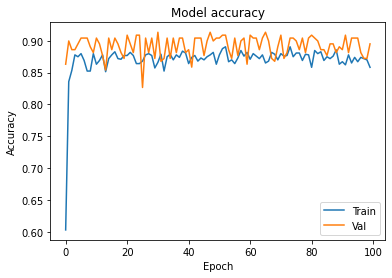

In [32]:
# Accuracy graph for model 3

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()